In [1]:
import sys
sys.path.append('../../../vysxd')
import numpy as np
import matplotlib.pyplot as plt
from FPC_define import *

In [3]:
A, B = FPC('EPW-alves')

We are interested to see the energy transfer in velocity space, so we need to integrate over x

Alternatively, just pick an x position that you want to look at.

In [4]:
A_int_wrt_x = np.trapz(A, axis = 0)
B_int_wrt_x = np.trapz(B, axis = 0)

# x_pos = 50
# A_int_wrt_x = A[x_pos,:,:]
# B_int_wrt_x = B[x_pos,:,:]


np.shape(A_int_wrt_x)

(128, 208)

Now, integrate over a couple timesteps such that the dissipative energy transfer overpowers the oscillatory

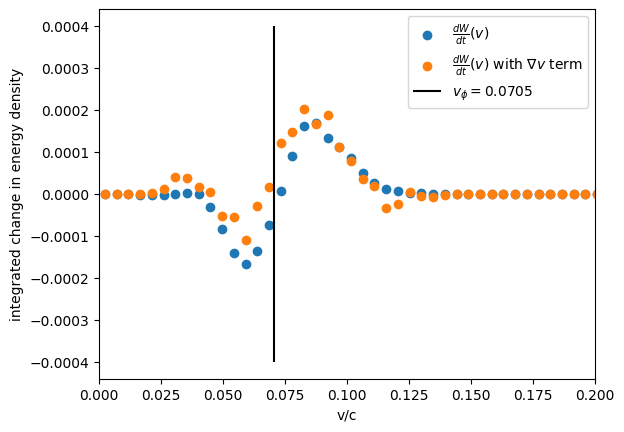

In [77]:
time_interval = [10,25]
A_full_int = np.trapz(A_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
B_full_int = np.trapz(B_int_wrt_x[:,time_interval[0]:time_interval[1]], axis = 1)
plt.scatter(np.linspace(-0.3,0.3, len(B_full_int)),B_full_int,label = r'$\frac{dW}{dt}(v)$')  
# plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int, label = 'A')
plt.scatter(np.linspace(-0.3,0.3, len(A_full_int)),A_full_int+B_full_int, label = r'$\frac{dW}{dt}(v)$ with $\nabla v$ term')
vphase = 0.0705
plt.vlines([vphase],-0.0004,+0.0004, label = r'$v_{\phi} =$'+ str(vphase), colors = 'black')
plt.xlim(0,0.2)
plt.ylabel('integrated change in energy density')
plt.xlabel('v/c')
plt.legend()

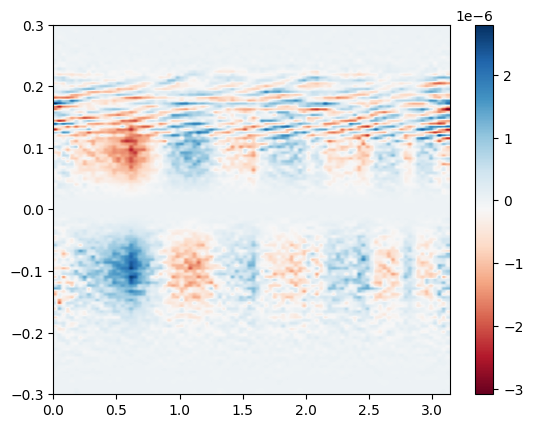

In [21]:
A, B = FPC('EPW-alves')
A_int_wrt_t, B_int_wrt_t = FPC_time_ave(A,B,10,92,0.992)

np.shape(A_int_wrt_t)
plt.imshow(B_int_wrt_t, origin='lower', cmap = 'RdBu', extent=[0, np.pi, -0.3, 0.3], aspect='auto')
plt.colorbar()